***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [29]:
dados = pd.read_csv('dados.csv')
dados.head()


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

In [30]:
dados.tail()
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [31]:
sm = 788
interval_classes = [0, sm*2, sm*5, sm*15, sm*25, sm*100]
interval_classes

[0, 1576, 3940, 11820, 19700, 78800]

### 2º Definir os labels das classes

In [32]:
labels_classes = ['E', 'D', 'C', 'B', 'A']
labels_classes

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [33]:
cut_data_renda = pd.cut(bins=interval_classes, labels=labels_classes, include_lowest=True,x=dados.Renda)
dados['classe'] = cut_data_renda

In [34]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E


In [35]:
frequencia = pd.value_counts(cut_data_renda)
frequencia

E    49755
D    18602
C     7241
B      822
A      405
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [36]:
percentual = pd.value_counts(values=cut_data_renda, normalize=True) * 100
percentual

E    64.764074
D    24.213472
C     9.425317
B     1.069964
A     0.527172
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [37]:
join_tables_renda = pd.DataFrame(data={'frequencia' : frequencia, 'percentual': percentual}, index = labels_classes)
join_tables_renda.sort_index(ascending=True)

,frequencia,percentual
A,405,0.527172
B,822,1.069964
C,7241,9.425317
D,18602,24.213472
E,49755,64.764074


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot: >

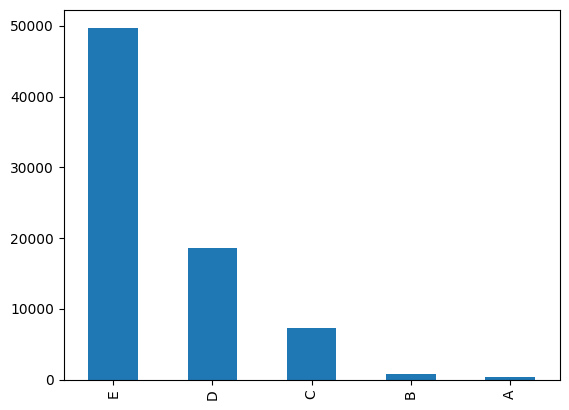

In [38]:
join_tables_renda['frequencia'].plot.bar()

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<AxesSubplot: ylabel='Frequency'>

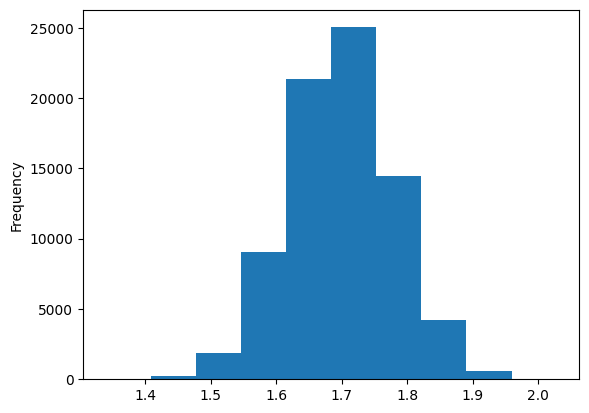

In [39]:
dados['Altura'].plot.hist()

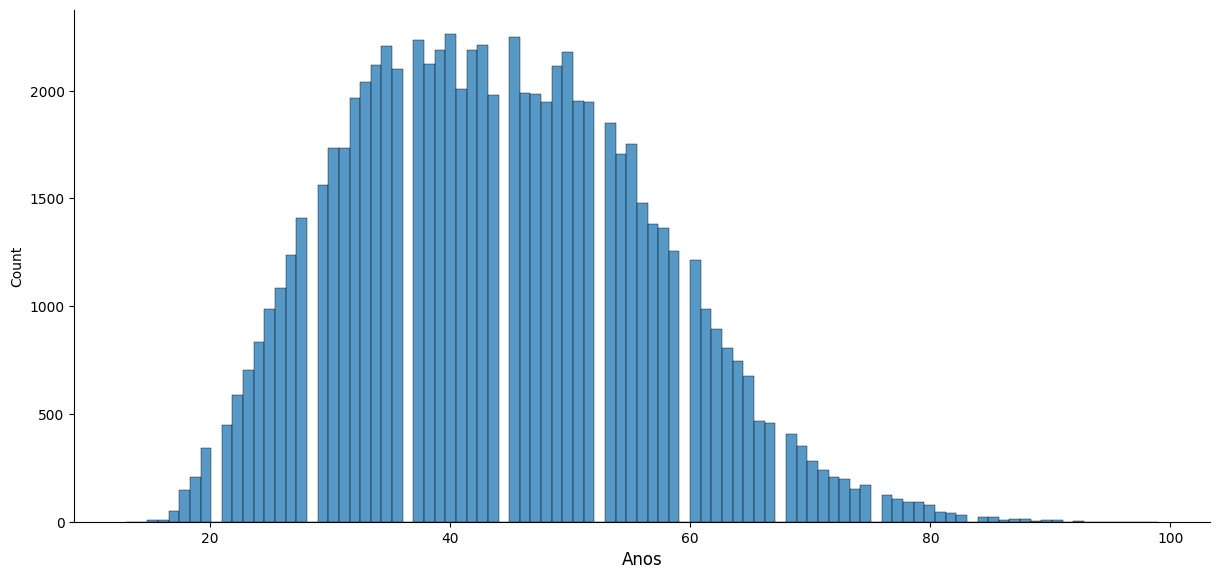

In [40]:
ax = sns.displot(data=dados['Idade'])
ax.figure.set_size_inches(14,6)
ax.set_titles('Dist Freq', fontsize=12)
ax.set_xlabels('Anos', fontsize=12)

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [41]:
renda = dados.query('Renda <= 20000')
renda

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


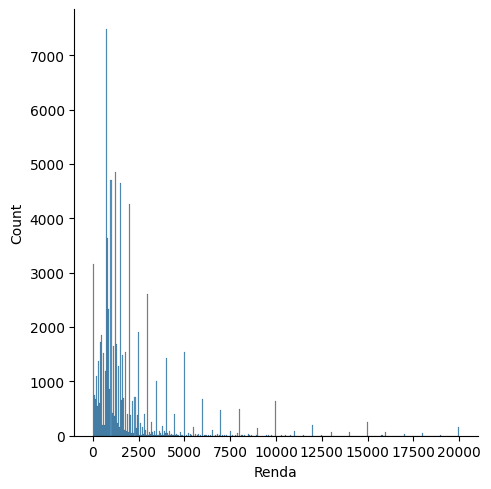

In [42]:
ax = sns.displot(renda['Renda'])

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [43]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [44]:
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [45]:
percentual = pd.crosstab(dados['Sexo'], dados['Cor'], normalize=True) * 100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [46]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [47]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [48]:
dados['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [49]:
dados['desvio'] = dados['Renda'] - dados['Renda'].mean()
dados['desvio'] = dados['desvio'].abs()
media = dados['desvio'].mean()
media



1526.4951371638058

In [50]:
dados['Renda'].mad()

C:\Users\jhonatan.rsantos4\AppData\Local\Temp\ipykernel_28868\1983770827.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados['Renda'].mad()


1526.4951371638058

### Obtenha a variância

In [51]:
dados['Renda'].var() ** 0.5

3323.3877303464037

### Obtenha o desvio-padrão

In [52]:
dados['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [53]:
dados_atualizados_renda = dados.query('Renda < 20000')

agg_sexo_cor = pd.crosstab(index=dados_atualizados_renda['Sexo'], columns=dados_atualizados_renda['Cor'], aggfunc=['max', 'median', 'mean'], values=dados_atualizados_renda['Renda'])
agg_sexo_cor.rename(index=sexo, inplace=True)
agg_sexo_cor.rename(columns=cor, inplace=True)
agg_sexo_cor


max                                median                  \
Cor       Indígena Branca  Preta Amarela  Parda Indígena  Branca   Preta   
Sexo                                                                       
Masculino    10000  19000  18000   18000  19179    797.5  1600.0  1200.0   
Feminino     12500  19663  18000   19000  18000    788.0  1200.0   800.0   

                                  mean                                         \
Cor       Amarela   Parda     Indígena       Branca        Preta      Amarela   
Sexo                                                                            
Masculino  2700.0  1200.0  1081.710938  2583.440044  1556.527130  4009.643172   
Feminino   1500.0   800.0  1289.030000  1970.410449  1127.025277  2881.025862   

                        
Cor              Parda  
Sexo                    
Masculino  1593.628579  
Feminino   1153.667957

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [59]:
agg_medidas_dispersao = pd.crosstab(index=dados['Sexo'], columns=dados['Cor'], aggfunc=['mean', 'std', 'var'], values=dados[['Renda']])
agg_medidas_dispersao

mean                                                      \
Cor             0            2            4            6            8   
Sexo                                                                    
0     1081.710938  2925.744435  1603.861687  4758.251064  1659.577425   
1     2464.386139  2109.866750  1134.596400  3027.341880  1176.758516   

               std                                                     \
Cor              0            2            4           6            8   
Sexo                                                                    
0      1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
1     11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

               var                                                          
Cor              0             2             4             6             8  
Sexo                                                                        
0     1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07  5.345747e+06  
1     1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07  2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot: xlabel='Renda', ylabel='Sexo'>

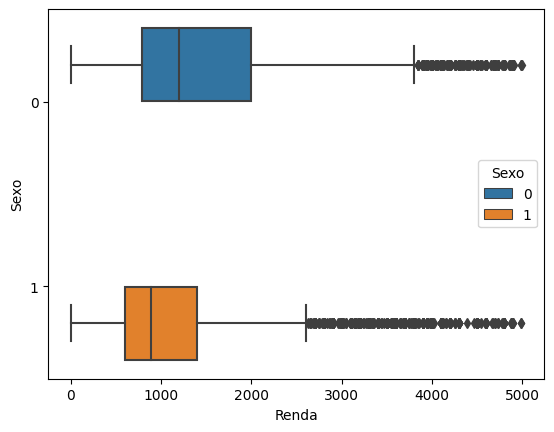

In [75]:
ax = sns.boxplot(x='Renda', y="Sexo", data=dados.query('Renda < 5000'), orient='h', hue="Sexo")
ax


<AxesSubplot: xlabel='Renda', ylabel='Cor'>

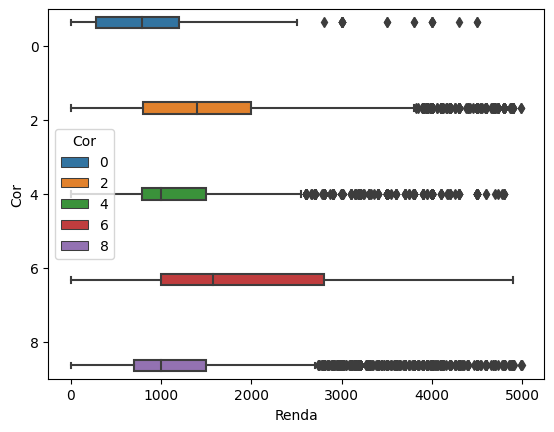

In [73]:
ax = sns.boxplot(x='Renda', y="Cor", data=dados.query('Renda < 5000'), orient='h', hue="Cor")
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [78]:
from scipy import stats

percentil = stats.percentileofscore(dados['Renda'], 788)
percentil


24.390942217595

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [81]:
valor_maximo = dados['Renda'].quantile(.99)
valor_maximo

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [84]:
renda_anos_estudo = pd.crosstab(index=dados['Sexo'], columns=dados['Anos de Estudo'], aggfunc=['std', 'median', 'mean'], values=dados[['Renda']])
renda_anos_estudo

std                                         \
Anos de Estudo           1            2            3            4    
Sexo                                                                 
0               1023.904884  1331.950552  1435.173827  2143.800133   
1                639.311534   425.291842   498.234168   424.124446   

                                                                    \
Anos de Estudo           5            6            7            8    
Sexo                                                                 
0               1419.821787  1484.650587  1476.628602  1419.708673   
1                629.553397   635.782641   574.547028   602.038029   

                                          ...         mean               \
Anos de Estudo           9            10  ...           8            9    
Sexo                                      ...                             
0               1515.583715  2137.664774  ...  1465.497940  1639.396667   
1                896.781213   973.221652  ...   830.751004   933.615351   

                                                                   \
Anos de Estudo          10           11           12           13   
Sexo                                                                
0               1508.03885  1731.270847  2117.060504  2470.330776   
1                868.02170   925.919225  1286.790889  1682.313725   

                                                                    
Anos de Estudo           14           15           16           17  
Sexo                                                                
0               3195.099154  3706.620269  6134.279790  1295.761905  
1               1911.730047  2226.460457  3899.513231   798.174419  

[2 rows x 51 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

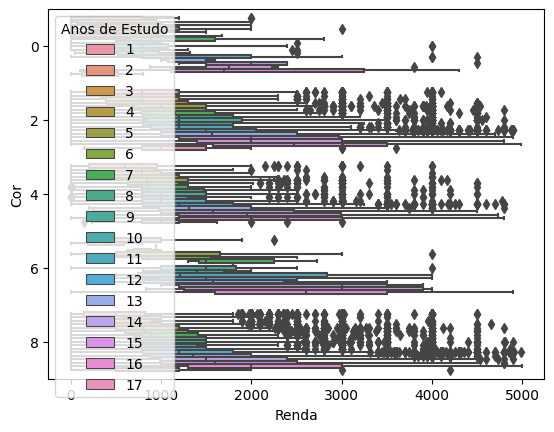

In [89]:
ax = sns.boxplot(x='Renda', y='Cor', hue='Anos de Estudo', data=dados.query('Renda < 5000'), orient='h')

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [91]:
amostra = dados.groupby(by='UF').agg({'Renda': ['mean', 'std']})
amostra

Renda             
           mean          std
UF                          
11  1789.761223  2406.161161
12  1506.091782  2276.233415
13  1445.130100  1757.935591
14  1783.588889  2079.659238
15  1399.076871  2053.779555
16  1861.353516  2020.688632
17  1771.094946  2934.590741
21  1019.432009  1887.816905
22  1074.550784  2373.355726
23  1255.403692  1821.963536
24  1344.721480  1651.805500
25  1293.370487  1950.272431
26  1527.079319  2389.622497
27  1144.552602  1237.856197
28  1109.111111  1478.997878
29  1429.645094  3507.917248
31  2056.432084  3584.721547
32  2026.383852  3513.846868
33  2496.403168  5214.583518
35  2638.104986  3503.777366
41  2493.870753  4302.937995
42  2470.854945  3137.651112
43  2315.158336  2913.335783
50  2262.604167  3031.419122
51  2130.652778  2542.630178
52  1994.580794  2221.933065
53  4241.954722  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

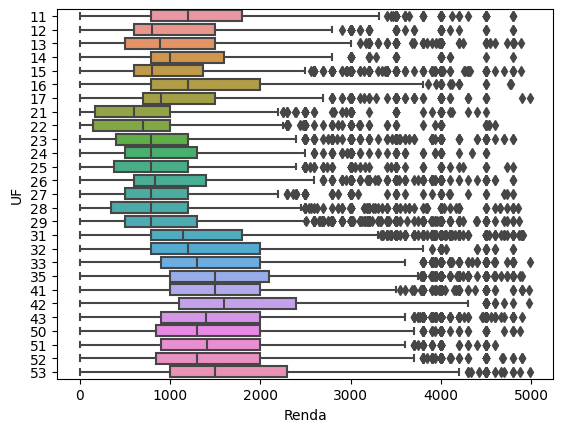

In [94]:
dados.rename()
ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda < 5000'), orient='h')

> ### Conclusões

Escreva suas conclusões aqui...